In [6]:
import pandas as pd
import pycaret.classification as clf
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
import matplotlib.pyplot as plt


rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False  

# 6분기별 모델링

## 데이터 불러오기

In [5]:
import pandas as pd
# 1분기-6분기 
real_final_q1_q6 = pd.read_csv('생성데이터/최종/real_final_q1_q6.csv', index_col = 0)

# 2분기-7분기
real_final_q2_q7 = pd.read_csv('생성데이터/최종/real_final_q2_q7.csv', index_col = 0)

# 3분기-8분기
real_final_q3_q8 = pd.read_csv('생성데이터/최종/real_final_q3_q8.csv', index_col = 0)

In [31]:
real_final_q1_q6.fillna(0, inplace=True)
real_final_q2_q7.fillna(0, inplace=True)
real_final_q3_q8.fillna(0, inplace=True)

## 데이터 모델시작

In [32]:
real_final_q3_q8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18866 entries, 1 to 19337
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ENGEL                             18866 non-null  float64
 1   주말 비율                             18866 non-null  float64
 2   Frequency_가구인테리어/잡화_고가            18866 non-null  float64
 3   Frequency_가구인테리어/잡화_저가            18866 non-null  float64
 4   Frequency_가구인테리어/잡화_중가            18866 non-null  float64
 5   Frequency_가전/레저취미/멀티샵_고가          18866 non-null  float64
 6   Frequency_가전/레저취미/멀티샵_저가          18866 non-null  float64
 7   Frequency_가전/레저취미/멀티샵_중가          18866 non-null  float64
 8   Frequency_교육문화/아동_고가              18866 non-null  float64
 9   Frequency_교육문화/아동_저가              18866 non-null  float64
 10  Frequency_교육문화/아동_중가              18866 non-null  float64
 11  Frequency_식품/생활_고가                18866 non-null  float64
 12  Freq

In [33]:
final_clf = clf
final_new_df = final_clf.setup(data=real_final_q1_q6,
                   target='purchase_sum_증감여부',
                   train_size= 0.8,
                   fold=5,data_split_stratify=True)

,Description,Value
0,session_id,4464
1,Target,purchase_sum_증감여부
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(18866, 73)"
5,Missing Values,False
6,Numeric Features,72
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
final_model =  final_clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7307,0.8045,0.7233,0.7226,0.7229,0.4609,0.4609,0.2400
gbc,Gradient Boosting Classifier,0.7254,0.7989,0.6994,0.7256,0.7123,0.4499,0.4502,2.8260
rf,Random Forest Classifier,0.7209,0.7937,0.7182,0.7105,0.7143,0.4415,0.4416,0.6940
et,Extra Trees Classifier,0.7185,0.7941,0.6904,0.7190,0.7044,0.4360,0.4363,0.3820
xgboost,Extreme Gradient Boosting,0.7145,0.7883,0.7057,0.7063,0.7060,0.4285,0.4285,1.8440
ada,Ada Boost Classifier,0.7081,0.7770,0.6703,0.7119,0.6905,0.4147,0.4154,0.5920
lda,Linear Discriminant Analysis,0.7056,0.7775,0.6732,0.7069,0.6896,0.4100,0.4104,0.0880
ridge,Ridge Classifier,0.7055,0.0000,0.6732,0.7068,0.6896,0.4098,0.4103,0.0360
lr,Logistic Regression,0.6936,0.7534,0.6657,0.6920,0.6786,0.3861,0.3864,2.6740
knn,K Neighbors Classifier,0.6863,0.7354,0.6594,0.6838,0.6714,0.3715,0.3718,0.9380


In [35]:
final_best_model = final_clf.tune_model(final_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7383,0.8151,0.7301,0.7311,0.7306,0.4762,0.4762
1,0.7211,0.8003,0.7164,0.7116,0.7140,0.4419,0.4419
2,0.7316,0.8052,0.7176,0.7265,0.7220,0.4626,0.4626
3,0.7200,0.7947,0.7196,0.7085,0.7140,0.4398,0.4399
4,0.7356,0.8148,0.7333,0.7254,0.7293,0.4709,0.4709
Mean,0.7293,0.8060,0.7234,0.7206,0.7220,0.4583,0.4583
Std,0.0075,0.0080,0.0069,0.0089,0.0071,0.0149,0.0149


In [36]:
final_clf.evaluate_model(final_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 최종 _lightgbm으로 다시 돌려보기

In [37]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X_train = real_final_q1_q6.drop('purchase_sum_증감여부', axis = 1, inplace=False)
y_train = real_final_q1_q6['purchase_sum_증감여부']

X_test = real_final_q2_q7.drop('purchase_sum_증감여부', axis = 1, inplace=False)
y_test = real_final_q2_q7['purchase_sum_증감여부']

print(X_train.shape, X_test.shape)

# 다시 쪼개기
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 4464)

lgbm_wrapper = LGBMClassifier(n_estimators = 270, colsample_bytree = 1.0, importance_type = 'split',
                              learning_rate = 0.05, max_depth = -1, min_child_samples = 66,
                             min_child_weight = 0.001, min_split_gain = 0, n_jobs = -1, num_leaves = 70, objective = None, 
                            reg_alpha = 0.005, reg_lambda = 0.05, silent = 'warn', subsample = 1.0, subsample_for_bin = 200000, subsample_freq = 0,
                              feature_fraction = 1, bagging_freq = 1, bagging_fraction = 0.9)

evals = [(X_tr, y_tr), (X_val, y_val)]

lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=200, eval_metric = 'logloss', eval_set = evals, verbose = True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

(18866, 72) (18866, 72)
[1]	training's binary_logloss: 0.680319	valid_1's binary_logloss: 0.682393
[2]	training's binary_logloss: 0.66872	valid_1's binary_logloss: 0.67368
[3]	training's binary_logloss: 0.65793	valid_1's binary_logloss: 0.66531
[4]	training's binary_logloss: 0.647955	valid_1's binary_logloss: 0.658461
[5]	training's binary_logloss: 0.638919	valid_1's binary_logloss: 0.651637
[6]	training's binary_logloss: 0.630294	valid_1's binary_logloss: 0.645615
[7]	training's binary_logloss: 0.622077	valid_1's binary_logloss: 0.639824
[8]	training's binary_logloss: 0.614247	valid_1's binary_logloss: 0.634276
[9]	training's binary_logloss: 0.60689	valid_1's binary_logloss: 0.628993
[10]	training's binary_logloss: 0.600004	valid_1's binary_logloss: 0.624739
[11]	training's binary_logloss: 0.593356	valid_1's binary_logloss: 0.620237
[12]	training's binary_logloss: 0.587039	valid_1's binary_logloss: 0.616187
[13]	training's binary_logloss: 0.581086	valid_1's binary_logloss: 0.612255
[1

[125]	training's binary_logloss: 0.342262	valid_1's binary_logloss: 0.537497
[126]	training's binary_logloss: 0.341153	valid_1's binary_logloss: 0.537466
[127]	training's binary_logloss: 0.340071	valid_1's binary_logloss: 0.537656
[128]	training's binary_logloss: 0.338831	valid_1's binary_logloss: 0.537742
[129]	training's binary_logloss: 0.337633	valid_1's binary_logloss: 0.537962
[130]	training's binary_logloss: 0.336631	valid_1's binary_logloss: 0.537906
[131]	training's binary_logloss: 0.335365	valid_1's binary_logloss: 0.537763
[132]	training's binary_logloss: 0.33431	valid_1's binary_logloss: 0.537968
[133]	training's binary_logloss: 0.333235	valid_1's binary_logloss: 0.537861
[134]	training's binary_logloss: 0.332039	valid_1's binary_logloss: 0.537731
[135]	training's binary_logloss: 0.331047	valid_1's binary_logloss: 0.538042
[136]	training's binary_logloss: 0.329992	valid_1's binary_logloss: 0.538119
[137]	training's binary_logloss: 0.328971	valid_1's binary_logloss: 0.538249


[236]	training's binary_logloss: 0.240257	valid_1's binary_logloss: 0.544346
[237]	training's binary_logloss: 0.239477	valid_1's binary_logloss: 0.544417
[238]	training's binary_logloss: 0.238713	valid_1's binary_logloss: 0.544495
[239]	training's binary_logloss: 0.237896	valid_1's binary_logloss: 0.544391
[240]	training's binary_logloss: 0.237243	valid_1's binary_logloss: 0.544589
[241]	training's binary_logloss: 0.236422	valid_1's binary_logloss: 0.544716
[242]	training's binary_logloss: 0.235741	valid_1's binary_logloss: 0.544885
[243]	training's binary_logloss: 0.235047	valid_1's binary_logloss: 0.544843
[244]	training's binary_logloss: 0.234315	valid_1's binary_logloss: 0.5449
[245]	training's binary_logloss: 0.233549	valid_1's binary_logloss: 0.545089
[246]	training's binary_logloss: 0.23285	valid_1's binary_logloss: 0.545081
[247]	training's binary_logloss: 0.232165	valid_1's binary_logloss: 0.54536
[248]	training's binary_logloss: 0.231382	valid_1's binary_logloss: 0.545495
[24

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

confusion = confusion_matrix(y_test, preds)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, pred_proba)

print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

[[6385 2832]
 [2593 7056]]
정확도: 0.7124, 정밀도: 0.7136, 재현율: 0.7313, F1: 0.7223, AUC:0.7864


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

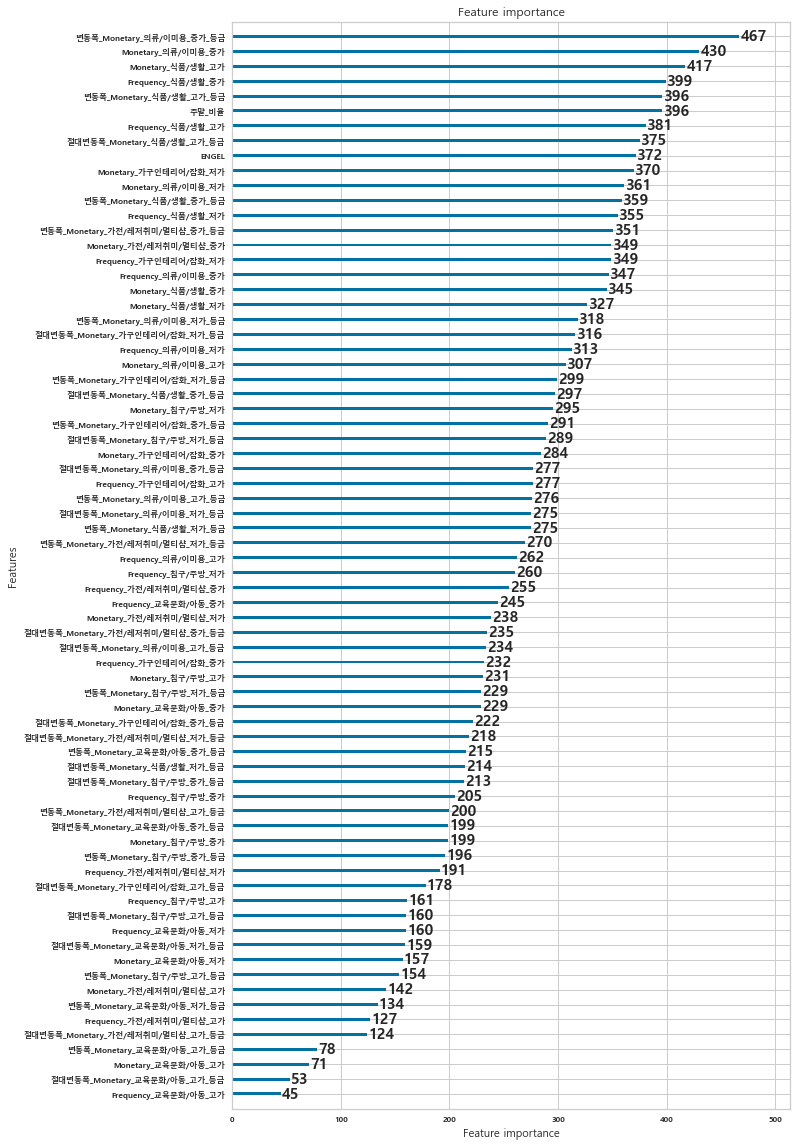

In [39]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))
plt.rc('font', size=15, weight="bold")
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 
plot_importance(lgbm_wrapper, ax=ax)

## 모델저장

In [40]:
import pickle
import joblib

filename = 'lgbm_wrapper_model_realfinal_6Q.pkl'
joblib.dump(lgbm_wrapper, filename)  

['lgbm_wrapper_model_realfinal_6Q.pkl']

In [41]:
# 파일 불러오기: 객체가 나올 것

lgbm = joblib.load('최종모델/lgbm_wrapper_model_realfinal_6Q.pkl')
lgbm

LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=270, n_jobs=-1, num_leaves=80, objective=None,
               random_state=None, reg_alpha=1, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## 입력값 넣어보기

In [42]:
import numpy as np 

# 2-7분기 대비 8분기 증감여부
db_df_test = pd.DataFrame(columns = ['predict_label'], index = X_test.index)
for cust in X_test.index:
    db_df_test.loc[cust, 'predict_label'] = lgbm.predict(np.array(X_test.loc[cust]).reshape(1, -1))[0]
db_df_test

,predict_label
CUSTNO,
1,1
2,0
3,1
4,1
6,0
...,...
19333,1
19334,1
19335,1


In [43]:
print('2-7분기 대비 2분기에서 8분기 증감 예측값')
print(db_df_test['predict_label'].value_counts(),'\n')

print('2-7분기 대비 2분기에서 8분기 증감 실제값')
print(y_test.value_counts(),'\n')

2-7분기 대비 2분기에서 8분기 증감 예측값
1    9982
0    8884
Name: predict_label, dtype: int64 

2-7분기 대비 2분기에서 8분기 증감 실제값
1    9649
0    9217
Name: purchase_sum_증감여부, dtype: int64 



# 3-8분기 대비 9분기 구매 증감 여부 예측

In [44]:
db_df = pd.DataFrame(columns = ['predict_label'], index = real_final_q3_q8.index)
for cust in real_final_q3_q8.index:
    db_df.loc[cust, 'predict_label'] = lgbm.predict(np.array(real_final_q3_q8.loc[cust]).reshape(1, -1))[0]
db_df

,predict_label
CUSTNO,
1,1
2,1
3,1
4,1
6,0
...,...
19333,1
19334,1
19335,1


In [45]:
Total_Top_Q3_Q8_plus_predictlabel = pd.concat([real_final_q3_q8, db_df], axis = 1)
Total_Top_Q3_Q8_plus_predictlabel

,ENGEL,주말 비율,Frequency_가구인테리어/잡화_고가,Frequency_가구인테리어/잡화_저가,Frequency_가구인테리어/잡화_중가,Frequency_가전/레저취미/멀티샵_고가,Frequency_가전/레저취미/멀티샵_저가,Frequency_가전/레저취미/멀티샵_중가,Frequency_교육문화/아동_고가,Frequency_교육문화/아동_저가,...,절대변동폭_Monetary_식품/생활_고가_등급,절대변동폭_Monetary_식품/생활_저가_등급,절대변동폭_Monetary_식품/생활_중가_등급,절대변동폭_Monetary_의류/이미용_고가_등급,절대변동폭_Monetary_의류/이미용_저가_등급,절대변동폭_Monetary_의류/이미용_중가_등급,절대변동폭_Monetary_침구/주방_고가_등급,절대변동폭_Monetary_침구/주방_저가_등급,절대변동폭_Monetary_침구/주방_중가_등급,predict_label
CUSTNO,,,,,,,,,,,,,,,,,,,,,
1,11.121356,0.223443,-0.158102,-0.705760,-0.089605,-0.050194,0.000000,-0.223669,0.000000,0.000000,...,5.2,0.0,10.0,7.8,2.3,4.0,17.2,9.4,16.6,1
2,12.718560,0.268983,-0.212057,1.173678,-0.098327,-0.787160,-0.259668,0.000000,0.000000,0.000000,...,9.2,5.1,8.3,7.5,8.3,6.5,24.4,0.0,25.7,1
3,88.712385,0.207592,0.000000,-5.370023,0.000000,0.000000,-0.055062,0.000000,0.000000,0.000000,...,4.2,3.8,0.0,0.0,1.5,0.0,0.0,1.1,0.0,1
4,35.580152,0.207576,0.000000,0.392258,0.111622,-0.468059,0.082593,-0.068111,0.000000,0.030618,...,4.2,2.7,4.8,5.4,5.5,4.0,7.7,6.9,6.5,1
6,34.899676,0.235732,0.186061,0.090496,0.199882,0.133551,0.279228,0.000000,0.000000,0.245313,...,9.6,3.8,6.7,0.0,2.6,3.9,9.8,9.4,10.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,99.903127,0.305709,0.000000,-0.372339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,7.7,0.0,0.0,0.0,0.0,0.0,0.0,1
19334,73.370821,0.217228,0.000000,-0.926857,0.000000,0.000000,-0.025964,0.000000,-0.130275,-2.357809,...,4.0,10.7,6.2,0.0,2.8,5.8,0.0,13.0,0.0,1
19335,42.901577,0.186784,0.000000,-1.702876,0.024436,0.000000,0.936766,-0.133531,0.295356,-1.435030,...,6.0,0.0,5.3,5.0,6.5,2.5,0.0,15.6,4.7,1


In [46]:
Total_Top_Q3_Q8_plus_predictlabel['predict_label'].value_counts()

1    10446
0     8420
Name: predict_label, dtype: int64

In [47]:
Total_Top_Q3_Q8_plus_predictlabel.to_csv('Total_Top_Q3_Q8_plus_predictlabel.csv')